In [9]:
import math, numpy
import observations.dimensions.one.sampling as observe
import matplotlib.pyplot as plt

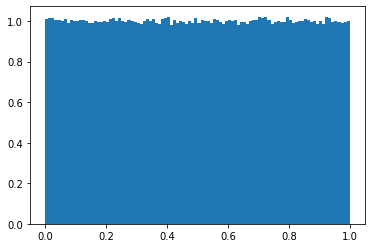

In [26]:
# Gaussian test

from scipy.stats import norm

plt.hist(norm.cdf(numpy.random.normal(size=int(1e6))), bins=100, density=True)
plt.show()

In [ ]:

plt.hist(numpy.transpose(observe.sample(0))[0], bins = 100, density = True)
plt.title("Distribution of $y$, according to uniform samples of $x$, mapped with $T(x)$")
plt.xlabel("$y_n$")
plt.ylabel("Density")
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler
import torch
import pyro.distributions as dist

ys = StandardScaler().fit_transform(observe.sample(0))
print(ys)

base_dist = dist.Normal(torch.zeros(1), torch.ones(1))
#base_dist = dist.Uniform(-10.0, 10.0)
spline_transform = dist.transforms.Spline(1, count_bins=16)
flow_dist = dist.TransformedDistribution(base_dist, [spline_transform])

steps = 1001
dataset = torch.tensor(ys, dtype=torch.float)
optimizer = torch.optim.Adam(spline_transform.parameters(), lr=1e-2)
for step in range(steps):
    optimizer.zero_grad()
    loss = -flow_dist.log_prob(dataset).mean()
    loss.backward()
    optimizer.step()
    flow_dist.clear_cache()

    if step % 200 == 0:
        print('step: {}, loss: {}'.format(step, loss.item()))

[[-3.08942024]
 [-3.08904951]
 [-3.08867881]
 ...
 [-1.02942228]
 [-1.02954586]
 [-1.02966944]]
step: 0, loss: 3.792736768722534
step: 200, loss: 1.0270097255706787
step: 400, loss: 0.9788528084754944
step: 600, loss: 0.9595803618431091
step: 800, loss: 0.969855010509491
step: 1000, loss: 0.9557418823242188


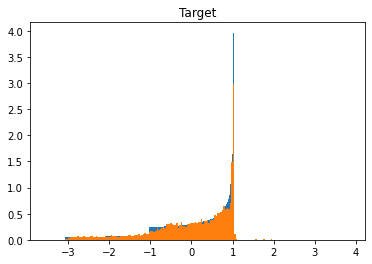

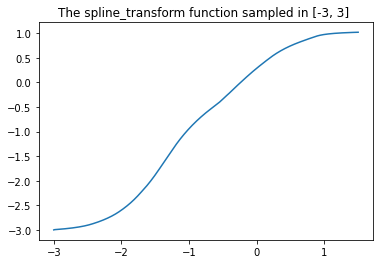

tensor([0.7341], grad_fn=<AddBackward0>)

In [4]:
plt.hist(ys, bins=200, density=True, label='The original sampled data (i.e. target)')

samples = flow_dist.sample(torch.Size([20000])).detach().numpy()
#samples = [flow_dist.sample(torch.Size([1])).detach().numpy()[0] for x in range(1000)]
#print(samples)

plt.hist(samples, bins=200, density=True, label='New points sampled from normal distribution and transported through flow')
plt.title('Target')
#plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.3))
plt.show()

input = numpy.linspace(-3, 1.5, 5000)
mapped = spline_transform(torch.tensor([[x] for x in input])).detach().numpy()

plt.plot(input, mapped)
plt.title("The spline_transform function sampled in [-3, 3] ")
plt.show()


flow_dist.log_prob(torch.tensor([1.0]))

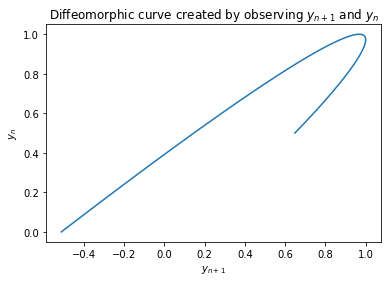

In [5]:
ys = observe.sample(1)

#plt.scatter(numpy.transpose(ys)[0], numpy.transpose(ys)[1], s = 0.5)
plt.plot(numpy.transpose(ys)[1], numpy.transpose(ys)[0])
plt.title("Diffeomorphic curve created by observing $y_{n+1}$ and $y_{n}$")
plt.xlabel('$y_{n+1}$')
plt.ylabel('$y_{n}$')
plt.show()

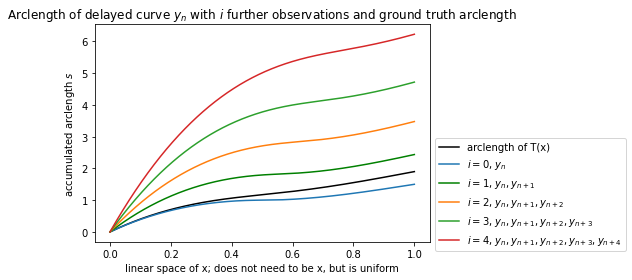

In [6]:
from observations.utils import arclen
from scipy.integrate import quad

def integrated_arclength(x):
    return quad(lambda x: math.sqrt(1 + pow((4.5 - 12*x + 6*pow(x,2)), 2)), 0, x)[0]

ys = observe.sample(4)
# print(numpy.linspace(0, 1, samplesize))
# print(arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1]]))



# print([numpy.transpose(ys)[0], numpy.transpose(ys)[1]])
# newxs = numpy.transpose(ys)[0]
# newys = numpy.transpose(ys)[1]
# print("my arclen")
# diff = [0]
# acc = 0
# for i in range(1, len(newxs)):
#     # print((newxs[i] - newxs[i-1])**2)
#     # print((newys[i] - newys[i-1])**2)
#     print(math.sqrt((newxs[i] - newxs[i-1])**2 + (newys[i] - newys[i-1])**2))
#     diff.append(acc + math.sqrt((newxs[i] - newxs[i-1])**2 + (newys[i] - newys[i-1])**2))
#     acc = acc + math.sqrt((newxs[i] - newxs[i-1])**2 + (newys[i] - newys[i-1])**2)

# print(diff)

# plt.scatter(numpy.linspace(0, 1, samplesize)[1:], arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1]]), label = "$i = 1$, $y_{n}, y_{n+1}$")
plt.plot(numpy.linspace(0, 1, observe.samplesize), [integrated_arclength(x) for x in numpy.linspace(0, 1, observe.samplesize)], color = "black", label = "arclength of T(x)")
plt.plot(numpy.linspace(0, 1, observe.samplesize)[1:], arclen([numpy.transpose(ys)[0]]), label = "$i = 0$, $y_{n}$")
plt.plot(numpy.linspace(0, 1, observe.samplesize)[1:], arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1]]), label = "$i = 1$, $y_{n}, y_{n+1}$", color = "green")
plt.plot(numpy.linspace(0, 1, observe.samplesize)[1:], arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2]]), label = "$i = 2$, $y_{n}, y_{n+1}, y_{n+2}$")
plt.plot(numpy.linspace(0, 1, observe.samplesize)[1:], arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2], numpy.transpose(ys)[3]]), label = "$i = 3$, $y_{n}, y_{n+1}, y_{n+2}, y_{n+3}$")
plt.plot(numpy.linspace(0, 1, observe.samplesize)[1:], arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2], numpy.transpose(ys)[3], numpy.transpose(ys)[4]]), label = "$i = 4$, $y_{n}, y_{n+1}, y_{n+2}, y_{n+3}, y_{n+4}$")

plt.title('Arclength of delayed curve $y_{n}$ with $i$ further observations and ground truth arclength')
plt.xlabel('linear space of x; does not need to be x, but is uniform')
plt.ylabel('accumulated arclength $s$')
plt.legend(loc="upper left", bbox_to_anchor=(1, 0.5))
plt.show()

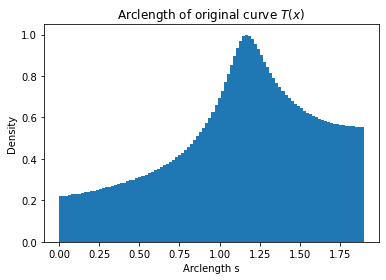

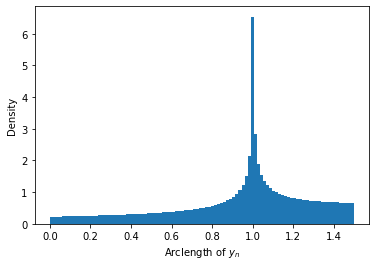

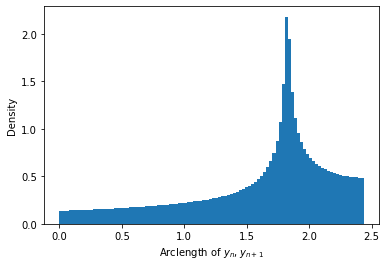

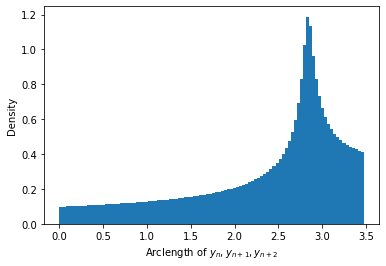

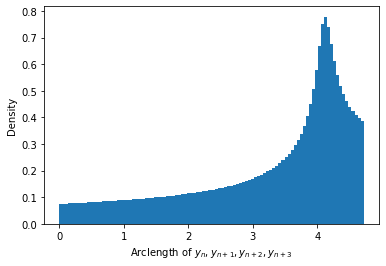

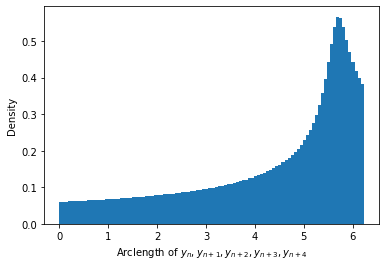

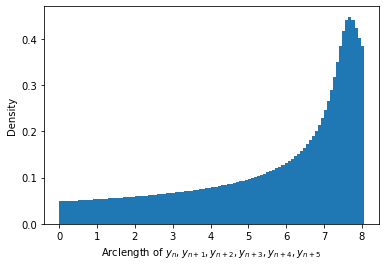

In [7]:
plt.hist([integrated_arclength(observe.step_sample(i, 0, 1, observe.samplesize)) for i in range(observe.samplesize)], bins = 100, density = True)
plt.title("Arclength of original curve $T(x)$")
plt.xlabel("Arclength s")
plt.ylabel("Density")
plt.show()

ys = observe.sample(5)
alen = arclen([numpy.transpose(ys)[0]])
plt.hist(alen, bins = 100, density = True)
plt.xlabel("Arclength of $y_{n}$")
plt.ylabel("Density")
plt.show()

alen = arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1]])
plt.hist(alen, bins = 100, density = True)
plt.xlabel("Arclength of $y_{n}, y_{n+1}$")
plt.ylabel("Density")
plt.show()

# ys = sample(2, step_sample)
alen = arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2]])
plt.hist(alen, bins = 100, density = True)
plt.xlabel("Arclength of $y_{n}, y_{n+1}, y_{n+2}$")
plt.ylabel("Density")
plt.show()

# ys = sample(3, step_sample)
alen = arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2], numpy.transpose(ys)[3]])
plt.hist(alen, bins = 100, density = True)
plt.xlabel("Arclength of $y_{n}, y_{n+1}, y_{n+2}, y_{n+3}$")
plt.ylabel("Density")
plt.show()

# ys = sample(4, step_sample)
alen = arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2], numpy.transpose(ys)[3], numpy.transpose(ys)[4]])
plt.hist(alen, bins = 100, density = True)
plt.xlabel("Arclength of $y_{n}, y_{n+1}, y_{n+2}, y_{n+3}, y_{n+4}$")
plt.ylabel("Density")
plt.show()

# ys = sample(5, step_sample)
alen = arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2], numpy.transpose(ys)[3], numpy.transpose(ys)[4], numpy.transpose(ys)[5]])
plt.hist(alen, bins = 100, density = True)
plt.xlabel("Arclength of $y_{n}, y_{n+1}, y_{n+2}, y_{n+3}, y_{n+4}, y_{n+5}$")
plt.ylabel("Density")
plt.show()

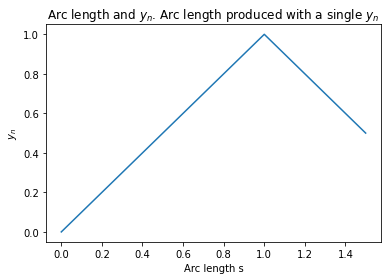

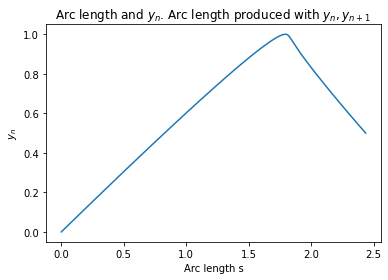

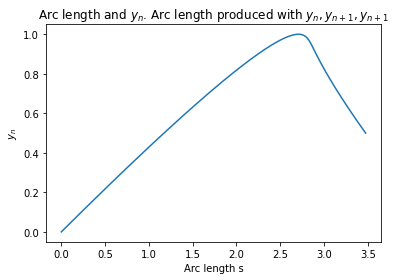

In [8]:
ys = observe.sample(0)
alen = arclen([numpy.transpose(ys)[0]])

plt.plot(alen, (numpy.transpose(ys)[0])[1:])
plt.title("Arc length and $y_n$. Arc length produced with a single $y_n$")
plt.xlabel('Arc length s')
plt.ylabel('$y_n$')
plt.show()

ys = observe.sample(1)
alen = arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1]])

plt.plot(alen, (numpy.transpose(ys)[0])[1:])
plt.title("Arc length and $y_n$. Arc length produced with $y_n, y_{n+1}$")
plt.xlabel('Arc length s')
plt.ylabel('$y_n$')
plt.show()

ys = observe.sample(2)
alen = arclen([numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2]])

plt.plot(alen, (numpy.transpose(ys)[0])[1:])
plt.title("Arc length and $y_n$. Arc length produced with $y_n, y_{n+1}, y_{n+1}$")
plt.xlabel('Arc length s')
plt.ylabel('$y_n$')
plt.show()

[[-9.5000e-01 -2.0000e+00 -1.9500e+00]
 [-9.4000e-01 -1.9900e+00 -1.9400e+00]
 [-9.3000e-01 -1.9800e+00 -1.9300e+00]
 ...
 [ 1.0200e+00  9.9990e-03 -3.9501e-02]
 [ 1.0300e+00  9.9000e-05 -4.9401e-02]
 [ 1.0400e+00 -9.8010e-03 -5.9301e-02]]
[[-9.50000000e-01 -2.00000000e+00 -1.95000000e+00]
 [-9.43333333e-01 -1.99333333e+00 -1.94333333e+00]
 [-9.36666667e-01 -1.98666667e+00 -1.93666667e+00]
 ...
 [ 1.03000000e+00  6.66637037e-03 -4.30002963e-02]
 [ 1.03666667e+00  4.41481481e-05 -4.96225185e-02]
 [ 1.04333333e+00 -6.57807407e-03 -5.62447407e-02]]


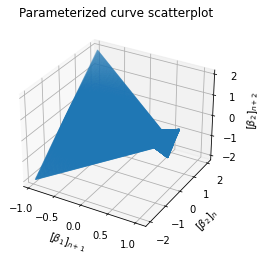

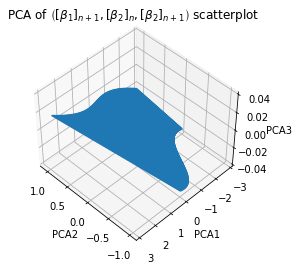

In [14]:
import random

import observations.dimensions.two.sampling as TwoDimensionalSampling

def cusp(xs):
    return xs[0]**3 - xs[0] * xs[1]

def step_sample2D(i, j, a, b):
    return [observe.step_sample(i, a, b), observe.step_sample(j, a, b)]

#def sample(observations, sample_fun, delta = 0.05):
random.seed(0)

samplesizex = 200
samplesizey = 200
delta = 0.05

ys = []

for i in range(samplesizex):
    for j in range(samplesizey):
        x = observe.step_sample(i, -1, 1, samplesizex)
        beta1 = observe.step_sample(j, -1, 1, samplesizey) # TODO 1-delta
        ys.append([beta1 + delta, cusp([x, beta1]), cusp([x, beta1 + delta])])

print(numpy.array(ys))
print(numpy.array(TwoDimensionalSampling.sample_beta_dir()))

ax = plt.axes(projection='3d')
ax.scatter(numpy.transpose(ys)[0], numpy.transpose(ys)[1], numpy.transpose(ys)[2], s=0.5)
ax.set_xlabel("$[\\beta_1]_{n+1}$")
ax.set_ylabel("$[\\beta_2]_{n}$")
ax.set_zlabel("$[\\beta_2]_{n+2}$")
plt.title("Parameterized curve scatterplot")
plt.show()

from sklearn.decomposition import PCA
pca = PCA()
pca.n_components = 3

data = pca.fit_transform(ys)

ax = plt.axes(projection='3d')
ax.scatter(numpy.transpose(data)[1], numpy.transpose(data)[0], numpy.transpose(data)[2], s = 0.5)
ax.set_xlabel("PCA2")
ax.set_ylabel("PCA1")
ax.set_zlabel("PCA3")
ax.azim = 135
ax.elev = 45
plt.title("PCA of $\\left([\\beta_1]_{n+1}, [\\beta_2]_n, [\\beta_2]_{n+1}\\right)$ scatterplot")
plt.show()

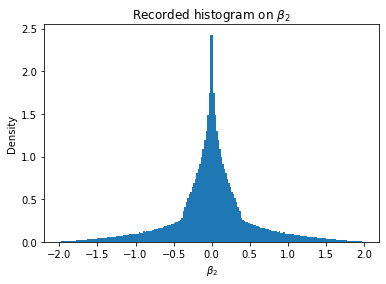

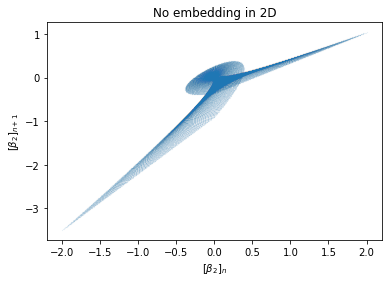

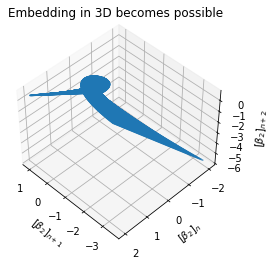

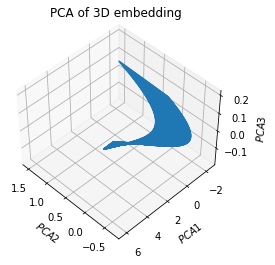

In [10]:
samplesizex = 200
samplesizey = 200
delta = 0.3

ys = []

for i in range(samplesizex):
    for j in range(samplesizey):
        x = numpy.linspace(-1, 1, samplesizex)[i] # TODO -2*delta?
        beta1 = numpy.linspace(-1, 1, samplesizex)[j]
        #x = step_sample(i, -1, 1, samplesizex) # TODO -2*delta?
        #beta1 = step_sample(j, -1, 1, samplesizey)
        ys.append([cusp([x, beta1]), cusp([x - delta, beta1]), cusp([x - 2 * delta, beta1])])

plt.hist(numpy.transpose(ys)[0], bins=200, density=True)
plt.title(r"Recorded histogram on $\beta_2$")
plt.xlabel(r"$\beta_2$")
plt.ylabel("Density")
plt.show()

plt.scatter(numpy.transpose(ys)[0], numpy.transpose(ys)[1], s = 0.001)
plt.title("No embedding in 2D")
plt.xlabel("$[\\beta_2]_{n}$")
plt.ylabel("$[\\beta_2]_{n+1}$")
plt.show()


ax = plt.axes(projection='3d')
ax.scatter(numpy.transpose(ys)[1], numpy.transpose(ys)[0], numpy.transpose(ys)[2], s = 0.5)
plt.title("Embedding in 3D becomes possible")
ax.set_xlabel("$[\\beta_2]_{n+1}$")
ax.set_ylabel("$[\\beta_2]_{n}$")
ax.set_zlabel("$[\\beta_2]_{n+2}$")
ax.azim = 135
ax.elev = 45
plt.show()

from sklearn.decomposition import PCA
pca = PCA()
pca.n_components = 3

data = pca.fit_transform(ys)

ax = plt.axes(projection='3d')
ax.scatter(numpy.transpose(data)[1], numpy.transpose(data)[0], numpy.transpose(data)[2], s = 0.5)
plt.title("PCA of 3D embedding")
ax.set_xlabel("$PCA2$")
ax.set_ylabel("$PCA1$")
ax.set_zlabel("$PCA3$")
ax.azim = 135
ax.elev = 45
plt.show()